# Problem 1
Feeding in the entire training dataset into the network is called an training epoch. As every image only
slightly changes the neural network weights, networks are typically trained for more than one epoch.

a) Creating a network module and design a network testNet with 784 input nodes, 100 hidden nodes, 10
output nodes and a learning rate of 0.6.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class NeuralNetwork:
    def __init__(self, iNodes, hNodes, oNodes, lRate):
        self.iNodes = iNodes
        self.hNodes = hNodes
        self.oNodes = oNodes
        self.wih = np.random.normal(0.0, 0.5, (hNodes, iNodes))
        self.who = np.random.normal(0.0, 0.5, (oNodes, hNodes))
        self.lRate = lRate
        self.actFunc = sigmoid

    # Query the network
    def query(self, inputs):
        inputs = inputs.reshape(-1, 1)
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.actFunc(hiddenInputs)
        finalInputs = np.dot(self.who, hiddenOutputs)
        finalOutputs = self.actFunc(finalInputs)
        return finalOutputs

    def train(self, imgArr, target):
        inputs = imgArr.flatten().reshape(-1, 1)
        target = np.array(target, ndmin=2).T

        # Forward pass
        hiddenInputs = np.dot(self.wih, inputs)
        hiddenOutputs = self.actFunc(hiddenInputs)
        finalInputs = np.dot(self.who, hiddenOutputs)
        finalOutputs = self.actFunc(finalInputs)

        # Error calculations
        outputErrors = target - finalOutputs
        hiddenErrors = np.dot(self.who.T, outputErrors)

        # Update weights
        self.who += self.lRate * np.dot((outputErrors * finalOutputs * (1.0 - finalOutputs)), np.transpose(hiddenOutputs))
        self.wih += self.lRate * np.dot((hiddenErrors * hiddenOutputs * (1.0 - hiddenOutputs)), np.transpose(inputs))

    # defining a batchTrain method
    def batchTrain(self, dataTrain, labelsTrain):
        for i in range(len(dataTrain)):
            self.train(dataTrain[i], labelsTrain[i])

    def evaluate(self, dataTest, labelsTest):
        correct = 0
        for i in range(len(dataTest)):
            outputs = self.query(dataTest[i])
            if np.argmax(outputs) == labelsTest[i]:
                correct += 1
        accuracy = correct / len(dataTest)
        return accuracy
    
    def saveWeights(self, wih='wih.npy', who='who.npy'):
        np.save(wih, self.wih)
        np.save(who, self.who)

    def restoreWeights(self, wih='wih.npy', who='who.npy'):
        self.wih = np.load(wih)
        self.who = np.load(who)
        
    def plotWeights(self, iteration):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(self.wih, cmap='Greys', interpolation='None')
        plt.title(f'Input to Hidden Weights at Iteration {iteration}')

        plt.subplot(1, 2, 2)
        plt.imshow(self.who, cmap='Greys', interpolation='None')
        plt.title(f'Hidden to Output Weights at Iteration {iteration}')

        plt.tight_layout()
        plt.show()

c) Training the network for at least 10 epochs...

In [4]:
data_train = np.load('/mnt/share/nnds/mnist/mnistDataTrain.npy')
labels_train = np.load('/mnt/share/nnds/mnist/mnistLabelsTrain.npy')

data_test = np.load('/mnt/share/nnds/mnist/mnistDataTest.npy')
labels_test = np.load('/mnt/share/nnds/mnist/mnistLabelsTest.npy')

In [4]:
testNet = NeuralNetwork(784, 100, 10, 0.6)

In [5]:
epochs = 10
score = []

start_time = time.time()

for epoch in range(epochs):
    testNet.batchTrain(data_train, labels_train)
    accuracy = testNet.evaluate(data_test, labels_test)
    score.append(accuracy)
    print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Total Execution Time: {execution_time} seconds")

Epoch 1/10, Accuracy: 0.098
Epoch 2/10, Accuracy: 0.098
Epoch 3/10, Accuracy: 0.098
Epoch 4/10, Accuracy: 0.098
Epoch 5/10, Accuracy: 0.098
Epoch 6/10, Accuracy: 0.098
Epoch 7/10, Accuracy: 0.098
Epoch 8/10, Accuracy: 0.098
Epoch 9/10, Accuracy: 0.098
Epoch 10/10, Accuracy: 0.098
Total Execution Time: 56.42575120925903 seconds


d) Generating a plot to illustrate the evolution of the network’s performance as a function of the number
of training epochs...

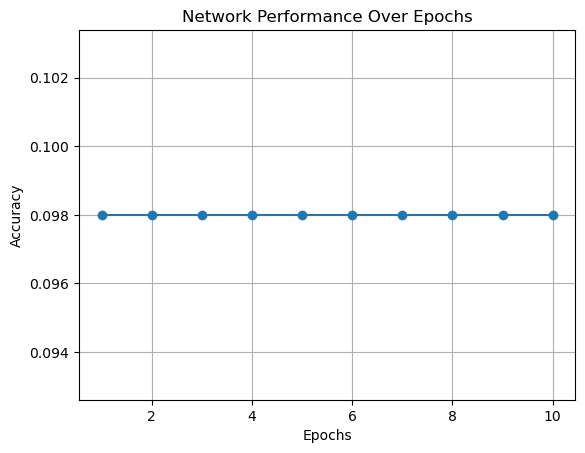

In [6]:
plt.plot(range(1, epochs + 1), score, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Network Performance Over Epochs')
plt.grid(True)
plt.show()

The neural network did not learn. This is probably due to factors such as the number of hidden nodes, the network's architecture, learning rate, and other hyperparameters.

# Problem 2
The number of hidden nodes has a big impact on the performance of the network. However, too many nodes
just increase the computational effort and slow down the convergence of the training process. What’s the
sweet spot?

a) Creating a list of integers nodes that contains values between 40 and 480 with a step size of 20, and using that
list and list comprehension to create a list of neural networks networks where the number of hidden
nodes are given by the list nodes.

In [7]:
nodes = list(range(40, 481, 20))

In [8]:
networks = [NeuralNetwork(784, node, 10, 0.6) for node in nodes]

b) Using the batchTrain method to train all networks, and evaluating the fraction of test
images that it classifies correctly.

In [12]:
score = []

for i, network in zip(range(len(networks)), networks):
    print(f"Network {i + 1}")  
    
    for epoch in range(epochs):
        network.batchTrain(data_train, labels_train)
        accuracy = network.evaluate(data_test, labels_test)
        print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy}")
        
        if epoch + 1 == epochs:
            score.append(accuracy)
    
    print("\n")
    
print(score)

Network 1


/tmp/ipykernel_67358/4245369931.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1/10, Accuracy: 0.1004
Epoch 2/10, Accuracy: 0.1009
Epoch 3/10, Accuracy: 0.1004
Epoch 4/10, Accuracy: 0.1005
Epoch 5/10, Accuracy: 0.1008
Epoch 6/10, Accuracy: 0.1009
Epoch 7/10, Accuracy: 0.1003
Epoch 8/10, Accuracy: 0.1008
Epoch 9/10, Accuracy: 0.1005
Epoch 10/10, Accuracy: 0.1003


Network 2
Epoch 1/10, Accuracy: 0.1028
Epoch 2/10, Accuracy: 0.1028
Epoch 3/10, Accuracy: 0.1028
Epoch 4/10, Accuracy: 0.1028
Epoch 5/10, Accuracy: 0.1028
Epoch 6/10, Accuracy: 0.1028
Epoch 7/10, Accuracy: 0.1028
Epoch 8/10, Accuracy: 0.1028
Epoch 9/10, Accuracy: 0.1028
Epoch 10/10, Accuracy: 0.1028


Network 3
Epoch 1/10, Accuracy: 0.1009
Epoch 2/10, Accuracy: 0.101
Epoch 3/10, Accuracy: 0.1011
Epoch 4/10, Accuracy: 0.1009
Epoch 5/10, Accuracy: 0.1011
Epoch 6/10, Accuracy: 0.101
Epoch 7/10, Accuracy: 0.1009
Epoch 8/10, Accuracy: 0.1009
Epoch 9/10, Accuracy: 0.1011
Epoch 10/10, Accuracy: 0.1013


Network 4
Epoch 1/10, Accuracy: 0.0892
Epoch 2/10, Accuracy: 0.0892
Epoch 3/10, Accuracy: 0.0892
Epoch 

c) Generating a plot to illustrate the classification performance as a function of the number of hidden nodes.

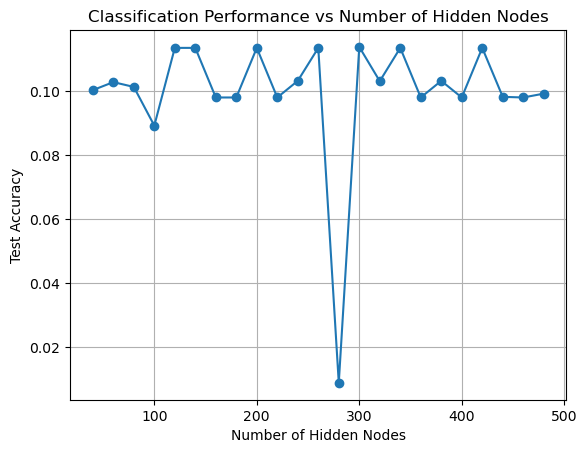

In [14]:
plt.plot(nodes, score, marker='o')
plt.title('Classification Performance vs Number of Hidden Nodes')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

We can see from the plot that the number of hidden nodes affects the accuracy of a trained neural network significantly.

# Problem 3
The learning rate controls the speed of the gradient descent which in turn affects the speed and quality of
the network’s convergence during the training process.

a) Creating a list or array lRates with 30 floats between 0.1 and 0.9, using list comprehension and these
learning rates to create a list of neural networks networks.

In [5]:
lRates = np.linspace(0.1, 0.9, 30)
print(lRates)

[0.1        0.12758621 0.15517241 0.18275862 0.21034483 0.23793103
 0.26551724 0.29310345 0.32068966 0.34827586 0.37586207 0.40344828
 0.43103448 0.45862069 0.4862069  0.5137931  0.54137931 0.56896552
 0.59655172 0.62413793 0.65172414 0.67931034 0.70689655 0.73448276
 0.76206897 0.78965517 0.81724138 0.84482759 0.87241379 0.9       ]


In [6]:
networks = [NeuralNetwork(784, 420, 10, lRate) for lRate in lRates]

b) Using the batchTrain method to train all networks, and evaluating the fraction of test
images that it classifies correctly with the different learning rates.

In [7]:
epochs = 10
score = []

for i, network in enumerate(networks):
    print(f"Network {i + 1}")  
    
    for epoch in range(epochs):
        network.batchTrain(data_train, labels_train)
        accuracy = network.evaluate(data_test, labels_test)
        print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy}")
        
        if epoch + 1 == epochs:
            score.append(accuracy)
    
    print("\n")
    
print(score)

Network 1
Epoch 1/10, Accuracy: 0.101
Epoch 2/10, Accuracy: 0.1009
Epoch 3/10, Accuracy: 0.095
Epoch 4/10, Accuracy: 0.0974
Epoch 5/10, Accuracy: 0.0974
Epoch 6/10, Accuracy: 0.0891
Epoch 7/10, Accuracy: 0.0891
Epoch 8/10, Accuracy: 0.0982
Epoch 9/10, Accuracy: 0.0108
Epoch 10/10, Accuracy: 0.0097


Network 2
Epoch 1/10, Accuracy: 0.0109
Epoch 2/10, Accuracy: 0.0061
Epoch 3/10, Accuracy: 0.0062
Epoch 4/10, Accuracy: 0.0065
Epoch 5/10, Accuracy: 0.0037
Epoch 6/10, Accuracy: 0.0038
Epoch 7/10, Accuracy: 0.0043
Epoch 8/10, Accuracy: 0.1073
Epoch 9/10, Accuracy: 0.0039
Epoch 10/10, Accuracy: 0.0051


Network 3
Epoch 1/10, Accuracy: 0.101
Epoch 2/10, Accuracy: 0.101
Epoch 3/10, Accuracy: 0.101
Epoch 4/10, Accuracy: 0.101
Epoch 5/10, Accuracy: 0.101
Epoch 6/10, Accuracy: 0.101
Epoch 7/10, Accuracy: 0.1145
Epoch 8/10, Accuracy: 0.1136
Epoch 9/10, Accuracy: 0.1138
Epoch 10/10, Accuracy: 0.1138


Network 4
Epoch 1/10, Accuracy: 0.0656
Epoch 2/10, Accuracy: 0.0296
Epoch 3/10, Accuracy: 0.0101
Ep

/tmp/ipykernel_71547/1577189904.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 9/10, Accuracy: 0.0057
Epoch 10/10, Accuracy: 0.1031


Network 5
Epoch 1/10, Accuracy: 0.0892
Epoch 2/10, Accuracy: 0.0892
Epoch 3/10, Accuracy: 0.0895
Epoch 4/10, Accuracy: 0.0892
Epoch 5/10, Accuracy: 0.0893
Epoch 6/10, Accuracy: 0.0892
Epoch 7/10, Accuracy: 0.0892
Epoch 8/10, Accuracy: 0.0136
Epoch 9/10, Accuracy: 0.0245
Epoch 10/10, Accuracy: 0.0274


Network 6
Epoch 1/10, Accuracy: 0.1032
Epoch 2/10, Accuracy: 0.1031
Epoch 3/10, Accuracy: 0.1031
Epoch 4/10, Accuracy: 0.1032
Epoch 5/10, Accuracy: 0.1032
Epoch 6/10, Accuracy: 0.1034
Epoch 7/10, Accuracy: 0.1033
Epoch 8/10, Accuracy: 0.008
Epoch 9/10, Accuracy: 0.0072
Epoch 10/10, Accuracy: 0.0069


Network 7
Epoch 1/10, Accuracy: 0.1029
Epoch 2/10, Accuracy: 0.1028
Epoch 3/10, Accuracy: 0.1026
Epoch 4/10, Accuracy: 0.1027
Epoch 5/10, Accuracy: 0.1024
Epoch 6/10, Accuracy: 0.1135
Epoch 7/10, Accuracy: 0.1135
Epoch 8/10, Accuracy: 0.1135
Epoch 9/10, Accuracy: 0.1135
Epoch 10/10, Accuracy: 0.098


Network 8
Epoch 1/10, Accuracy: 

c) Generating a plot to illustrate the classification performance as a function of the learning rate. 

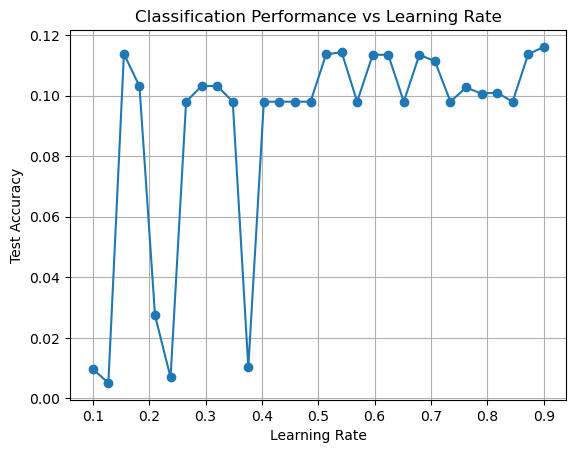

In [8]:
plt.plot(lRates, score, marker='o')
plt.title('Classification Performance vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

We can see from the plot that the learning rate affects the accuracy of a trained neural network significantly.

# Problem 4
In the first three problems, you have explored the parameter space for the three free parameters of our
custom neural network. Time for an actual application!

a) Creating the `readNet` neural network...

In [17]:
#bestLrInd = np.argmax(score)
bestLRate = lRates[29]
bestNumHNodes = 420

readNet = NeuralNetwork(784, bestNumHNodes, 10, bestLRate)

b) Training the network and using the `saveWeights` method to save the weights.

In [18]:
for epoch in range(epochs):
    readNet.batchTrain(data_train, labels_train)
    accuracy = readNet.evaluate(data_test, labels_test)
    score.append(accuracy)
    print(f"Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy}")
    
readNet.saveWeights(wih='readNet_wih.npy', who='readNet_who.npy')

/tmp/ipykernel_71547/1577189904.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 1/10, Accuracy: 0.098
Epoch 2/10, Accuracy: 0.098
Epoch 3/10, Accuracy: 0.098
Epoch 4/10, Accuracy: 0.098
Epoch 5/10, Accuracy: 0.098
Epoch 6/10, Accuracy: 0.098
Epoch 7/10, Accuracy: 0.098
Epoch 8/10, Accuracy: 0.098
Epoch 9/10, Accuracy: 0.098
Epoch 10/10, Accuracy: 0.098


c) Normalizing my handwritten digit array, querying it with my trained network, and applying the `softmax` function to the output vector...

In [30]:
from PIL import Image

img = Image.open("eight.gif").convert('L')
imgSize = 128
imgRe = img.resize(size=(imgSize, imgSize))
img = np.array(img) 

In [31]:
def softmax(arr):
    exp_arr = np.exp(arr - np.max(arr))  # Subtracting max for numerical stability
    return exp_arr / exp_arr.sum()

In [32]:
handwritten_digit = img / 255.0
output_vector = readNet.query(handwritten_digit)
softmax_output = softmax(output_vector)

ValueError: shapes (420,784) and (16384,1) not aligned: 784 (dim 1) != 16384 (dim 0)

The `readNet` could not query the handwritten digit after normalization due to the difference in image array dimensions it was developed for at the input nodes.